In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

In [3]:
ath_events = pd.read_csv('athlete_events.csv')

In [4]:
noc_reg = pd.read_csv('noc_regions.csv')

In [5]:
ath_events.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [6]:
noc_reg.columns

Index(['NOC', 'region', 'notes'], dtype='object')

In [7]:
ath_events.sample(n=2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
69770,35539,Sven Fischer,M,30.0,186.0,82.0,Germany,GER,2002 Winter,2002,Winter,Salt Lake City,Biathlon,Biathlon Men's 12.5 kilometres Pursuit,NaN
93978,47567,Brooke Mackenzie Henderson,F,18.0,163.0,50.0,Canada,CAN,2016 Summer,2016,Summer,Rio de Janeiro,Golf,Golf Women's Individual,NaN


In [8]:
ath_events.shape

(271116, 15)

In [9]:
noc_reg.sample(n=2)

,NOC,region,notes
106,KEN,Kenya,NaN
50,CRO,Croatia,NaN


In [10]:
noc_reg.shape

(230, 3)

In [11]:
df = ath_events.merge(
    noc_reg, on='NOC', how='left'
)

In [12]:
df.sample(n=1)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
219124,110077,Yekaterina Yevgenyevna Shumilova,F,27.0,173.0,57.0,Russia,RUS,2014 Winter,2014,Winter,Sochi,Biathlon,Biathlon Women's 10 kilometres Pursuit,NaN,Russia,NaN


In [13]:
df.duplicated().sum()

1385

In [14]:
df.drop_duplicates(inplace=True)

In [15]:
df.duplicated().sum()

0

In [16]:
df.isna().sum()

ID             0
Name           0
Sex            0
Age         9315
Height     58814
Weight     61527
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     229959
region       370
notes     264696
dtype: int64

In [17]:
[val for val in df.columns if df[val].isnull().sum() > 0]

['Age', 'Height', 'Weight', 'Medal', 'region', 'notes']

In [18]:
mask = df.isnull()

total = mask.sum()

percent = 100*mask.mean()

missing_data = pd.concat([total, percent], axis=1,join='outer',keys=['count_missing', 'percentage_missing (%)'])

missing_data.sort_values(by='percentage_missing (%)', ascending=False,inplace=True)

missing_data

,count_missing,percentage_missing (%)
notes,264696,98.133325
Medal,229959,85.254939
Weight,61527,22.810504
Height,58814,21.804687
Age,9315,3.453441
region,370,0.137174
Season,0,0.000000
Event,0,0.000000
Sport,0,0.000000
City,0,0.000000


In [19]:
nullable_columns = df.columns[mask.any()].tolist()

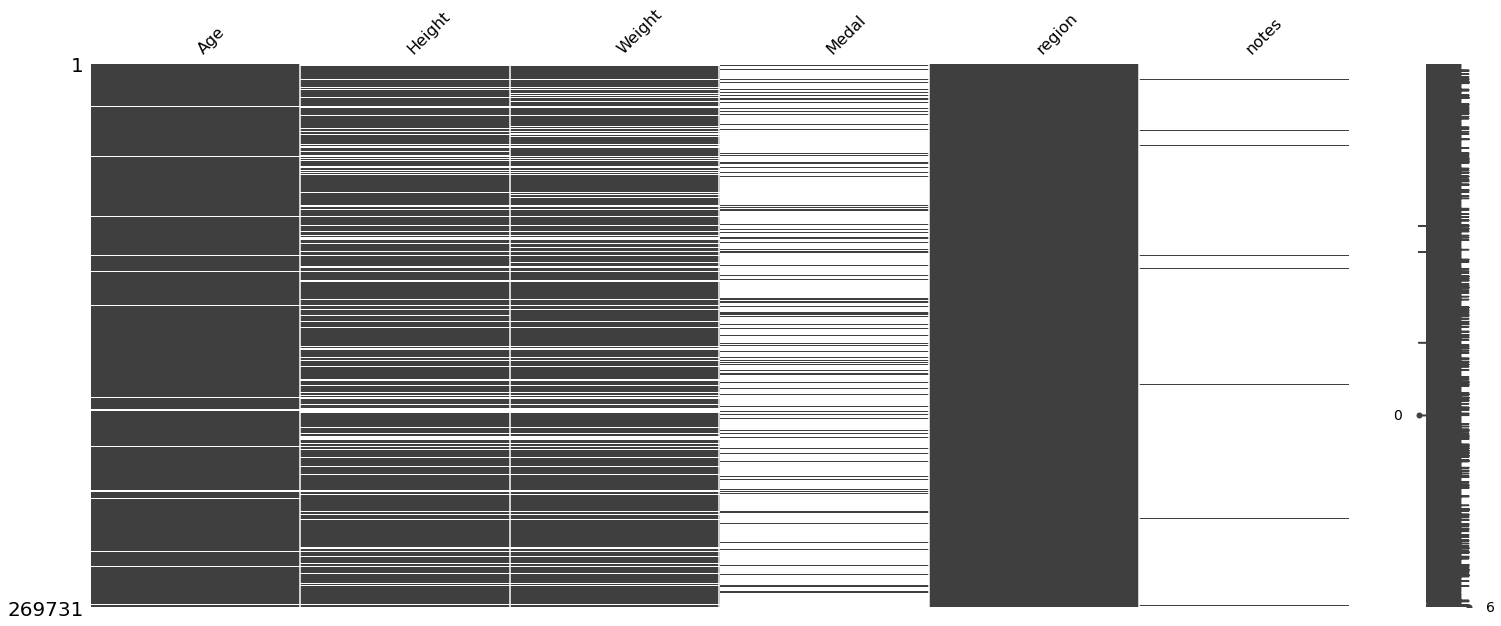

In [20]:
msno.matrix(df[nullable_columns])
plt.show()

In [21]:
df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal', 'region', 'notes'],
      dtype='object')

In [22]:
df.Medal.value_counts()

Gold      13369
Bronze    13295
Silver    13108
Name: Medal, dtype: int64

In [23]:
df = pd.concat([df, pd.get_dummies(df['Medal'])], axis=1)

In [24]:
df.sample(n=2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
173081,86987,"Richard Alexander ""Rex"" Norris",M,28.0,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
124549,62899,Mikhail Mikhaylovich Korshuk,M,26.0,182.0,70.0,Belarus,BLR,1996 Summer,1996,Summer,Atlanta,Badminton,Badminton Mixed Doubles,NaN,Belarus,NaN,0,0,0


In [25]:
df.groupby('NOC').sum()[['Gold', 'Silver', 'Bronze']].sort_values('Gold', ascending=False).reset_index()

,NOC,Gold,Silver,Bronze
0,USA,2638.0,1641.0,1358.0
1,URS,1082.0,732.0,689.0
2,GER,745.0,674.0,746.0
3,GBR,677.0,739.0,651.0
4,ITA,575.0,531.0,531.0
...,...,...,...,...
225,LAO,0.0,0.0,0.0
226,AHO,0.0,1.0,0.0
227,LBR,0.0,0.0,0.0
228,LCA,0.0,0.0,0.0


In [26]:
medal_tally = df.drop_duplicates(subset=['Team', 'NOC', 'Year', 'City', 'Sport', 'Event', 'Medal'])
medal_tally

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271095,135559,Pawe Jan Zygmunt,M,25.0,182.0,79.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Speed Skating,"Speed Skating Men's 5,000 metres",NaN,Poland,NaN,0,0,0
271096,135559,Pawe Jan Zygmunt,M,29.0,182.0,79.0,Poland,POL,2002 Winter,2002,Winter,Salt Lake City,Speed Skating,"Speed Skating Men's 5,000 metres",NaN,Poland,NaN,0,0,0
271097,135559,Pawe Jan Zygmunt,M,29.0,182.0,79.0,Poland,POL,2002 Winter,2002,Winter,Salt Lake City,Speed Skating,"Speed Skating Men's 10,000 metres",NaN,Poland,NaN,0,0,0
271098,135559,Pawe Jan Zygmunt,M,33.0,182.0,79.0,Poland,POL,2006 Winter,2006,Winter,Torino,Speed Skating,"Speed Skating Men's 5,000 metres",NaN,Poland,NaN,0,0,0


In [27]:
medal_tally = medal_tally.groupby('NOC').sum()[['Gold', 'Silver', 'Bronze']].sort_values('Gold', ascending=False).reset_index()

In [28]:
medal_tally['total'] = medal_tally['Gold'] + medal_tally['Silver'] + medal_tally['Bronze']

=======

In [29]:
years = df['Year'].unique().tolist()

In [30]:
years.sort()

In [31]:
years.insert(0, 'Overall')

In [32]:
country = np.unique(df['region'].dropna().values).tolist()

In [33]:
country

['Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Boliva',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guam',
 'Guatemala',
 'Guinea',
 'Guin

In [34]:
country.insert(0, 'Overall')

In [35]:
country

['Overall',
 'Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Boliva',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guam',
 'Guatemala',
 'Gui

In [36]:
medal_df = df.drop_duplicates(subset=['Team', 'NOC', 'Year', 'City', 'Sport', 'Event', 'Medal'])
medal_df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271095,135559,Pawe Jan Zygmunt,M,25.0,182.0,79.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Speed Skating,"Speed Skating Men's 5,000 metres",NaN,Poland,NaN,0,0,0
271096,135559,Pawe Jan Zygmunt,M,29.0,182.0,79.0,Poland,POL,2002 Winter,2002,Winter,Salt Lake City,Speed Skating,"Speed Skating Men's 5,000 metres",NaN,Poland,NaN,0,0,0
271097,135559,Pawe Jan Zygmunt,M,29.0,182.0,79.0,Poland,POL,2002 Winter,2002,Winter,Salt Lake City,Speed Skating,"Speed Skating Men's 10,000 metres",NaN,Poland,NaN,0,0,0
271098,135559,Pawe Jan Zygmunt,M,33.0,182.0,79.0,Poland,POL,2006 Winter,2006,Winter,Torino,Speed Skating,"Speed Skating Men's 5,000 metres",NaN,Poland,NaN,0,0,0


In [37]:
def fetch_medal_tally(df, years, country):
    medal_df = df.drop_duplicates(subset=['Team', 'NOC', 'Year', 'City', 'Sport', 'Event', 'Medal'])
    flag = 0
    if years == 'Overall' and country == 'Overall':
        temp_df = medal_df

    if years == 'Overall' and country != 'Overall':
        flag = 1
        temp_df = medal_df[medal_df['region'] == country]

    if years != 'Overall' and country == 'Overall':
        temp_df = medal_df[medal_df['Year'] == int(years)]

    if years != 'Overall' and country != 'Overall':
        temp_df = medal_df[(medal_df['Year'] == int(years)) & (medal_df['region'] == country)]
    
    if flag == 1:
        x = temp_df.groupby('Year').sum()[['Gold', 'Silver', 'Bronze']].sort_values('Year').reset_index()
    else:
        x = temp_df.groupby('region').sum()[['Gold', 'Silver', 'Bronze']].sort_values('Gold', ascending=False).reset_index()
    
    x['total'] = x['Gold'] + x['Silver'] + x['Bronze']
    
    print(x)

In [38]:
fetch_medal_tally(df, years='1900', country='India')

  region  Gold  Silver  Bronze  total
0  India     0       2       0      2


========

Overall Analysis

- No. of editions
- No. of cities
- No. of events/sports
- No. of athletes
- participating nations

In [39]:
df.sample(n=1)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
45635,23548,"William Michael ""Bill"" Coventry",M,21.0,185.0,81.0,New Zealand,NZL,1988 Summer,1988,Summer,Seoul,Rowing,Rowing Men's Coxless Fours,NaN,New Zealand,NaN,0,0,0


In [40]:
df['Year'].unique().shape[0] - 1

34

In [41]:
df['City'].unique().shape

(42,)

In [42]:
df['Sport'].unique().shape

(66,)

In [43]:
df['Event'].unique().shape

(765,)

In [44]:
df['Name'].unique().shape

(134732,)

In [45]:
df['region'].unique().shape

(206,)

=========

In [46]:
nations_over_time = df.drop_duplicates(['Year', 'region'])['Year'].value_counts().reset_index().sort_values('index')

In [47]:
nations_over_time

,index,Year
34,1896,12
28,1900,31
33,1904,14
32,1906,20
31,1908,22
29,1912,29
30,1920,29
26,1924,46
27,1928,46
25,1932,47


In [48]:
nations_over_time.rename(columns={'index':'Edition', 'Year':'Number of Countries'}, inplace=True)

In [49]:
import plotly.express as px

In [50]:
fig = px.line(nations_over_time, x='Edition', y='Number of Countries')

In [51]:
fig

===========

In [52]:
df.drop_duplicates(['Year', 'region'])['Year'].value_counts().reset_index().sort_values('index')

,index,Year
34,1896,12
28,1900,31
33,1904,14
32,1906,20
31,1908,22
29,1912,29
30,1920,29
26,1924,46
27,1928,46
25,1932,47


==========

In [53]:
import seaborn as sns

In [54]:
x=df.drop_duplicates(['Year', 'Sport', 'Event'])
x

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194996,97860,Lonce Gaston Quentin,M,40.0,NaN,NaN,France,FRA,1920 Summer,1920,Summer,Antwerpen,Archery,"Archery Men's Target Archery, 28 metres, Indiv...",Silver,France,NaN,0,0,1
196039,98435,Ioannis Raisis,M,NaN,NaN,NaN,Greece,GRE,1906 Summer,1906,Summer,Athina,Fencing,"Fencing Men's Sabre, Masters, Individual",Silver,Greece,NaN,0,0,1
213142,107029,Franz Xaver Schmid,M,27.0,NaN,NaN,Germany,GER,1932 Summer,1932,Summer,Los Angeles,Alpinism,Alpinism Mixed Alpinism,Gold,Germany,NaN,0,1,0
214105,107506,Hermann Schreiber,M,26.0,NaN,NaN,Switzerland,SUI,1936 Summer,1936,Summer,Berlin,Aeronautics,Aeronautics Mixed Aeronautics,Gold,Switzerland,NaN,0,1,0


<AxesSubplot:xlabel='Year', ylabel='Sport'>

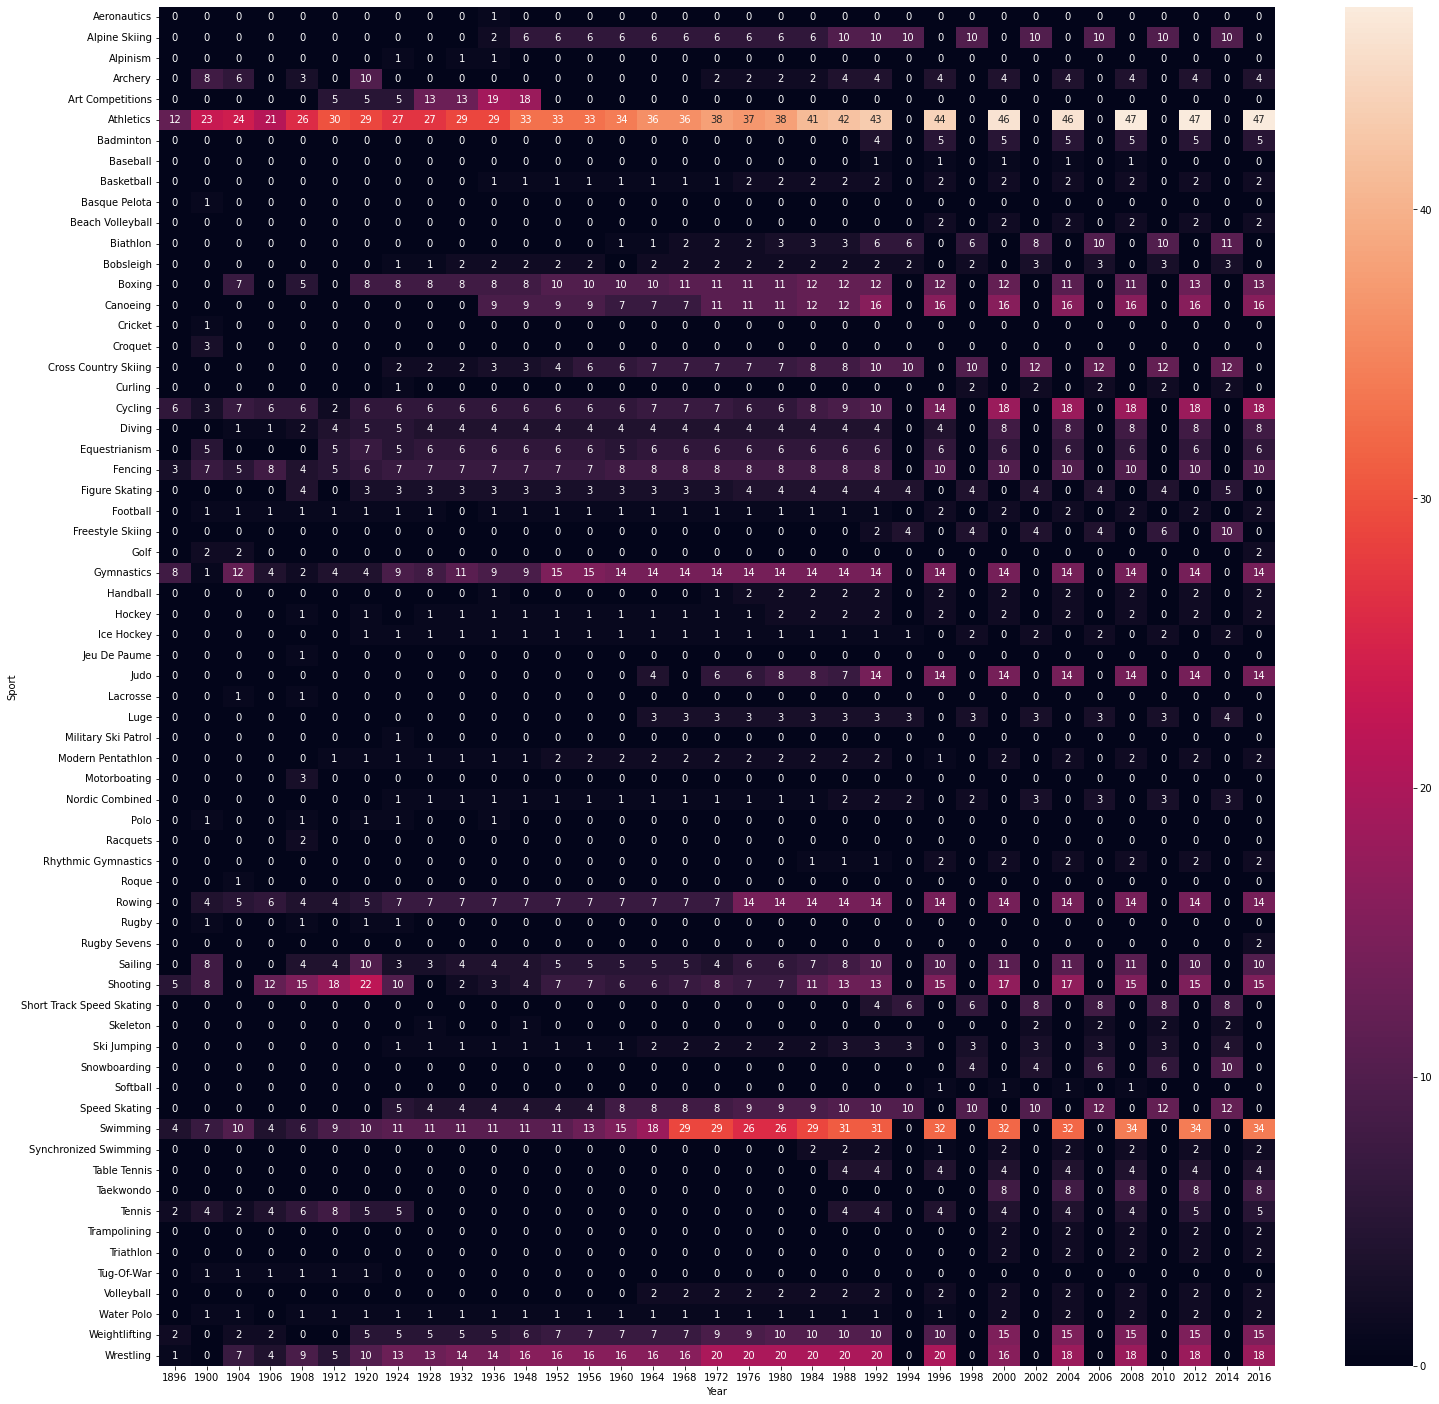

In [55]:
plt.figure(figsize=(25,25))
sns.heatmap(x.pivot_table(index=df['Sport'], columns=df['Year'],values='Event',
                        aggfunc='count').fillna(0).astype('int'),annot=True)

<AxesSubplot:xlabel='Year', ylabel='Sport'>

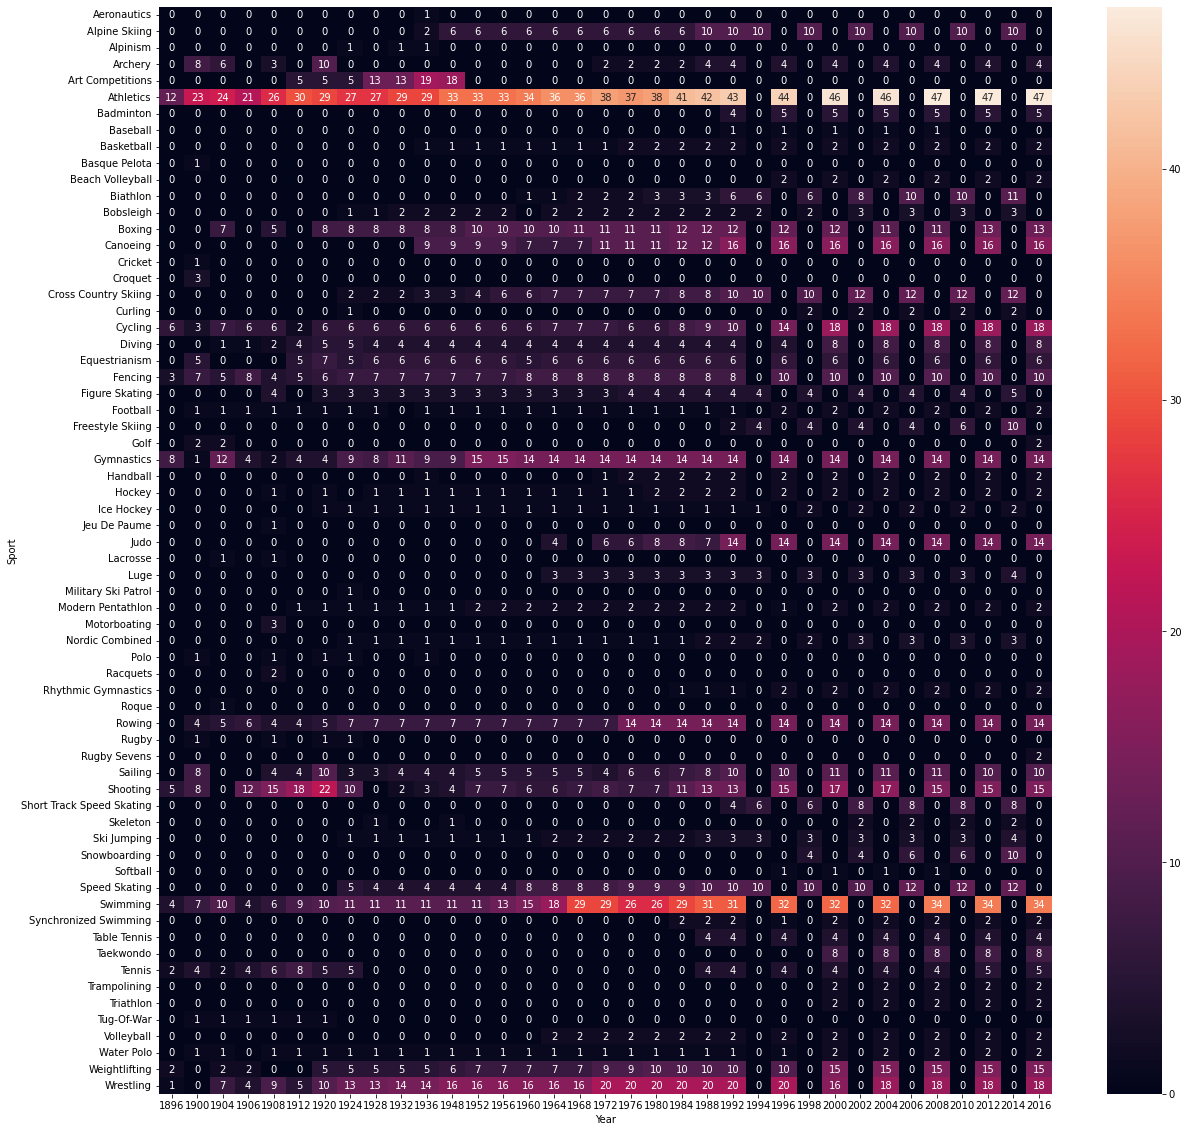

In [56]:
plt.figure(figsize=(20,20))
sns.heatmap(x.pivot_table(index=df['Sport'], columns=df['Year'], values='Event'
            ,aggfunc='count').fillna(0).astype('int'),annot=True)

======

In [57]:
df.dropna(subset=['Medal'])['Name'].value_counts().reset_index().merge(df, left_on='index'
                , right_on='Name', how='left')[['index', 'Name_x', 'Sport', 'region']].drop_duplicates('index').head()

,index,Name_x,Sport,region
0,"Michael Fred Phelps, II",28,Swimming,USA
30,Larysa Semenivna Latynina (Diriy-),18,Gymnastics,Russia
49,Nikolay Yefimovich Andrianov,15,Gymnastics,Russia
73,Edoardo Mangiarotti,13,Fencing,Italy
87,Takashi Ono,13,Gymnastics,Japan


In [73]:
def most_successful(df, sport):
    temp_df = df.dropna(subset=['Medal'])
    
    if sport != 'Overall':
        temp_df = temp_df[temp_df['Sport'] == sport]
    x = temp_df['Name'].value_counts().reset_index().merge(
        df, left_on='index', right_on='Name', how='left')[['index', 'Name_x', 'Sport', 'region']].drop_duplicates('index')
    
    x.rename(columns={'index':'Name', 'Name_x':'Medals'}, inplace=True)
    return x

In [74]:
most_successful(df, 'Overall')

,Name,Medals,Sport,region
0,"Michael Fred Phelps, II",28,Swimming,USA
30,Larysa Semenivna Latynina (Diriy-),18,Gymnastics,Russia
49,Nikolay Yefimovich Andrianov,15,Gymnastics,Russia
73,Edoardo Mangiarotti,13,Fencing,Italy
87,Takashi Ono,13,Gymnastics,Japan
...,...,...,...,...
76178,Haralambie Ivanov,1,Canoeing,Romania
76180,Georgi Ivanov,1,Football,Bulgaria
76181,Eduard Georgiyevich Ivanov,1,Ice Hockey,Russia
76182,Dimitrie Ivanov,1,Canoeing,Romania


=========

`Country-Wise`

-   Country-wise medal tally per year(line plot)
-   What countries are good at heatmap
-   Most successful Athletes(Top 10)

In [60]:
temp_df = df.dropna(subset=['Medal'])
temp_df.drop_duplicates(subset=['Team', 'NOC', 'Games', 'Year', 'City', 'Sport',
                                'Event', 'Medal'], inplace=True)

C:\Users\ACT\AppData\Local\Temp\ipykernel_7588\4103261585.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [61]:
new_df = temp_df[temp_df['region'] == 'country']
final_df = new_df.groupby('Year').count()['Medal'].reset_index()

In [62]:
fig = px.line(final_df, x='Year', y='Medal')
fig.show()

=====

<AxesSubplot:xlabel='Year', ylabel='Sport'>

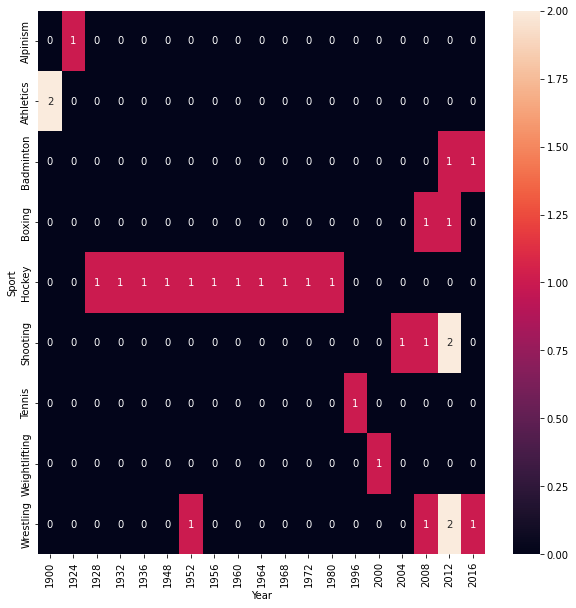

In [63]:
new_df = temp_df[temp_df['region'] == 'India']
plt.figure(figsize=(20,20))
sns.heatmap(new_df.pivot_table(index='Sport', columns='Year', values='Medal', aggfunc='count').fillna(0), annot=True)

In [64]:
def most_successful(df, country):
    temp_df = df.dropna(subset=['Medal'])
    temp_df = temp_df[temp_df['region'] == country]
    
    x = temp_df['Name'].value_counts().reset_index().head(10).merge(df, left_on='index'
                , right_on='Name', how='left')[['index', 'Name_x', 'Sport', 'region']].drop_duplicates('index').head()
    
    x.rename(columns={'index':'Name', 'Name_x':'Medals'}, inplace=True)
    return x

In [65]:
most_successful(df, 'India')

,Name,Medals,Sport,region
0,Udham Singh Kular,4,Hockey,India
4,Leslie Walter Claudius,4,Hockey,India
8,Ranganathan Francis,3,Hockey,India
11,"Balbir Singh Dosanjh, Sr.",3,Hockey,India
14,Harbinder Singh Chimni,3,Hockey,India


In [66]:
import plotly.figure_factory as ff

In [67]:
athlete_df = df.drop_duplicates(subset=['Name', 'region'])

In [68]:
x1 = athlete_df['Age'].dropna()
x2 = athlete_df[athlete_df['Medal'] == 'Gold']['Age'].dropna()
x3 = athlete_df[athlete_df['Medal'] == 'Silver']['Age'].dropna()
x4= athlete_df[athlete_df['Medal'] == 'Bronze']['Age'].dropna()

In [69]:
ff.create_distplot([x1, x2, x3, x4], ['Overall Age', 'Gold Medalist', 'Silver Medalist', 'Bronze Medalist'],show_rug=False ,show_hist=False)
fig.show()